In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [30]:
df = pd.read_parquet('Resources/model_df.parquet')
df

,"('second_of_day',)","('day_of_year',)","('weekend',)","('holiday',)","('PUx',)","('PUy',)","('DOx',)","('DOy',)","('distance',)","('duration(sec)',)",...,"('PU_Bronx',)","('PU_Brooklyn',)","('PU_Manhattan',)","('PU_Queens',)","('PU_Staten Island',)","('DO_Bronx',)","('DO_Brooklyn',)","('DO_Manhattan',)","('DO_Queens',)","('DO_Staten Island',)"
0,5,1,False,1,-8.213879e+06,4.960411e+06,-8.232220e+06,4.983524e+06,18.85,1599.0,...,False,False,False,True,False,False,False,True,False,False
1,9,1,False,1,-8.220657e+06,4.992372e+06,-8.218525e+06,4.993771e+06,2.47,785.0,...,True,False,False,False,False,True,False,False,False,False
2,33,1,False,1,-8.231953e+06,4.974857e+06,-8.232025e+06,4.972525e+06,2.02,474.0,...,False,False,False,True,False,False,True,False,False,False
3,38,1,False,1,-8.212420e+06,4.977409e+06,-8.216190e+06,4.976140e+06,2.47,459.0,...,False,False,False,True,False,False,False,False,True,False
4,42,1,False,1,-8.235990e+06,4.975327e+06,-8.235160e+06,4.976716e+06,1.06,335.0,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6046562,85846,366,False,0,-8.217649e+06,4.988984e+06,-8.221850e+06,4.985513e+06,2.48,534.0,...,True,False,False,False,False,True,False,False,False,False
6046563,85864,366,False,0,-8.234034e+06,4.964909e+06,-8.231941e+06,4.963280e+06,1.58,488.0,...,False,True,False,False,False,False,True,False,False,False
6046564,85870,366,False,0,-8.236077e+06,4.972248e+06,-8.236077e+06,4.972248e+06,0.60,256.0,...,False,False,True,False,False,False,False,True,False,False
6046565,86042,366,False,0,-8.220615e+06,4.964609e+06,-8.224081e+06,4.965819e+06,1.36,266.0,...,False,False,False,True,False,False,True,False,False,False


In [31]:
df.columns

Index(['('second_of_day',)', '('day_of_year',)', '('weekend',)',
       '('holiday',)', '('PUx',)', '('PUy',)', '('DOx',)', '('DOy',)',
       '('distance',)', '('duration(sec)',)', '('fore',)', '('tolls',)',
       '('airport',)', '('congestion',)', '('total',)', '('service',)',
       '('PU_Bronx',)', '('PU_Brooklyn',)', '('PU_Manhattan',)',
       '('PU_Queens',)', '('PU_Staten Island',)', '('DO_Bronx',)',
       '('DO_Brooklyn',)', '('DO_Manhattan',)', '('DO_Queens',)',
       '('DO_Staten Island',)'],
      dtype='object')

In [32]:
df.columns = df.columns.str.replace("'", "")
df.columns = df.columns.str.replace("(", "")
df.columns = df.columns.str.replace(")", "")
df.columns = df.columns.str.replace(",", "")

In [33]:
df.columns

Index(['second_of_day', 'day_of_year', 'weekend', 'holiday', 'PUx', 'PUy',
       'DOx', 'DOy', 'distance', 'durationsec', 'fore', 'tolls', 'airport',
       'congestion', 'total', 'service', 'PU_Bronx', 'PU_Brooklyn',
       'PU_Manhattan', 'PU_Queens', 'PU_Staten Island', 'DO_Bronx',
       'DO_Brooklyn', 'DO_Manhattan', 'DO_Queens', 'DO_Staten Island'],
      dtype='object')

In [34]:
#change this range to filter days of data

df_filter_range = range(1, 366)

filter_mask = df['day_of_year'].isin(df_filter_range)

df_filtered = df[filter_mask]

df_filtered

,second_of_day,day_of_year,weekend,holiday,PUx,PUy,DOx,DOy,distance,durationsec,...,PU_Bronx,PU_Brooklyn,PU_Manhattan,PU_Queens,PU_Staten Island,DO_Bronx,DO_Brooklyn,DO_Manhattan,DO_Queens,DO_Staten Island
0,5,1,False,1,-8.213879e+06,4.960411e+06,-8.232220e+06,4.983524e+06,18.85,1599.0,...,False,False,False,True,False,False,False,True,False,False
1,9,1,False,1,-8.220657e+06,4.992372e+06,-8.218525e+06,4.993771e+06,2.47,785.0,...,True,False,False,False,False,True,False,False,False,False
2,33,1,False,1,-8.231953e+06,4.974857e+06,-8.232025e+06,4.972525e+06,2.02,474.0,...,False,False,False,True,False,False,True,False,False,False
3,38,1,False,1,-8.212420e+06,4.977409e+06,-8.216190e+06,4.976140e+06,2.47,459.0,...,False,False,False,True,False,False,False,False,True,False
4,42,1,False,1,-8.235990e+06,4.975327e+06,-8.235160e+06,4.976716e+06,1.06,335.0,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6029383,86329,365,False,0,-8.237008e+06,4.972977e+06,-8.237962e+06,4.973270e+06,0.78,260.0,...,False,False,True,False,False,False,False,True,False,False
6029384,86342,365,False,0,-8.231049e+06,4.985572e+06,-8.228383e+06,4.983967e+06,1.17,396.0,...,False,False,True,False,False,True,False,False,False,False
6029385,86347,365,False,0,-8.235867e+06,4.973600e+06,-8.233179e+06,4.969790e+06,4.41,888.0,...,False,False,True,False,False,False,True,False,False,False
6029386,86359,365,False,0,-8.228986e+06,4.967457e+06,-8.228028e+06,4.964763e+06,1.41,366.0,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
X = df_filtered.copy()
X = X.drop('service', axis=1)

y = df_filtered['service'].values.reshape(-1,1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=29)

In [37]:
X_sel = X[['PU_Bronx', 'total', 'airport', 'tolls']]

In [38]:
X_sel_train, X_sel_test, y_sel_train, y_sel_test = train_test_split(X_sel, y)

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)

In [40]:
knn.fit(X_sel_train, y_sel_train)

KNeighborsClassifier()

In [41]:
print(f"Training Data Score: {knn.score(X_sel_train, y_sel_train)}")
print(f"Testing Data Score: {knn.score(X_sel_test, y_sel_test)}")

Training Data Score: 0.7114266493734375
Testing Data Score: 0.7058567048486216


In [9]:
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled

array([[-0.05579452, -1.28330094, -0.61791355, ...,  0.9417449 ,
        -0.4563116 , -0.1060154 ],
       [ 0.16395545, -0.82795171, -0.61791355, ..., -1.06185869,
        -0.4563116 , -0.1060154 ],
       [-0.18453512, -0.94178902, -0.61791355, ..., -1.06185869,
         2.19148494, -0.1060154 ],
       ...,
       [-2.029045  , -0.25876518,  1.61834936, ...,  0.9417449 ,
        -0.4563116 , -0.1060154 ],
       [ 0.80854942, -0.82795171, -0.61791355, ...,  0.9417449 ,
        -0.4563116 , -0.1060154 ],
       [-0.12003118, -0.48643979, -0.61791355, ..., -1.06185869,
        -0.4563116 , -0.1060154 ]])

k: 1, Train/Test Score: 1.000/0.684
k: 3, Train/Test Score: 0.841/0.682
k: 5, Train/Test Score: 0.801/0.686
k: 7, Train/Test Score: 0.782/0.686
k: 9, Train/Test Score: 0.767/0.685
k: 11, Train/Test Score: 0.757/0.684
k: 13, Train/Test Score: 0.750/0.685
k: 15, Train/Test Score: 0.742/0.684
k: 17, Train/Test Score: 0.736/0.682
k: 19, Train/Test Score: 0.732/0.682


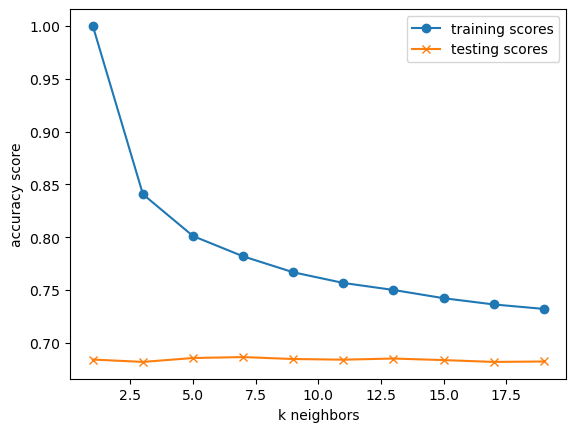

In [ ]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)

In [13]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [15]:
print(f"Training Data Score: {knn.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn.score(X_test_scaled, y_test)}")

Training Data Score: 0.8010333103769296
Testing Data Score: 0.6855334612714875


In [16]:
predicted = knn.predict(X_test_scaled)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

mean squared error (MSE): 0.3767424768282226
R-squared (R2): 0.4317316204163135


In [19]:
lr = sm.OLS(y_train, X_train_scaled).fit()

In [21]:
df.columns

Index(['second_of_day', 'day_of_year', 'weekend', 'holiday', 'PUx', 'PUy',
       'DOx', 'DOy', 'distance', 'durationsec', 'fore', 'tolls', 'airport',
       'congestion', 'total', 'service', 'PU_Bronx', 'PU_Brooklyn',
       'PU_Manhattan', 'PU_Queens', 'PU_Staten Island', 'DO_Bronx',
       'DO_Brooklyn', 'DO_Manhattan', 'DO_Queens', 'DO_Staten Island'],
      dtype='object')

In [27]:
lr.pvalues.sort_values()

x15    0.000000e+00
x14    0.000000e+00
x12    0.000000e+00
x11    0.000000e+00
x13    1.197980e-57
x6     2.728133e-32
x25    1.393970e-09
x22    2.346428e-09
x8     2.399535e-07
x24    1.044168e-06
x9     1.794051e-06
x21    2.899580e-05
x10    2.446091e-04
x2     2.658263e-04
x7     1.451921e-01
x20    1.997287e-01
x19    2.568203e-01
x17    2.604071e-01
x23    2.690160e-01
x16    5.013970e-01
x1     5.049497e-01
x3     5.395929e-01
x4     5.736376e-01
x5     7.870040e-01
x18    9.884696e-01
dtype: float64

In [163]:
len(X_train_scaled)

4520459

In [164]:
X_train_scaled[:5]

array([[-1.83215311e-01, -1.59265221e+00,  1.51176538e+00,
        -1.54131235e-01,  2.47177486e+00, -1.60295382e+00,
        -2.86647934e-01,  2.80892598e-01,  2.80279702e+00,
         6.73144064e-01,  2.71337813e+00, -2.73168973e-01,
        -2.40603296e-01,  7.90775215e-01,  2.38198606e+00,
        -2.91144400e-01, -4.79896085e-01, -1.09512658e+00,
         2.14112571e+00, -1.01696688e-01, -2.94250297e-01,
        -4.95186981e-01,  9.30919307e-01, -4.55209150e-01,
        -1.02170812e-01],
       [ 7.23120055e-01, -2.36621386e-01,  1.51176538e+00,
        -1.54131235e-01, -5.13425782e-01,  4.20443986e-01,
        -5.94995605e-01,  1.41769839e-01, -5.59973309e-01,
        -1.62544834e-01, -4.63581628e-01, -2.73168973e-01,
        -2.40603296e-01,  9.83075770e-01, -4.72671775e-01,
        -2.91144400e-01, -4.79896085e-01,  9.13136451e-01,
        -4.67044038e-01, -1.01696688e-01, -2.94250297e-01,
        -4.95186981e-01,  9.30919307e-01, -4.55209150e-01,
        -1.02170812e-01],
    

In [165]:
y

0          0
1          1
2          2
3          2
4          0
          ..
6029383    1
6029384    2
6029385    0
6029386    1
6029387    2
Name: service, Length: 6027279, dtype: int64

In [166]:
y_test

1105781    1
4834828    0
4215501    2
1911665    2
1673270    0
          ..
752264     2
2562470    0
2211901    0
385425     1
4622756    2
Name: service, Length: 1506820, dtype: int64

In [167]:
y_train

96405      0
2581913    2
3734264    1
5929491    0
3566461    0
          ..
207263     0
5737194    1
4256734    0
3419786    0
2056906    0
Name: service, Length: 4520459, dtype: int64

In [168]:
len(X_test_scaled)

1506820

In [169]:
lr = LinearRegression()

In [170]:
lr.fit(X_train, y_train)

LinearRegression()

In [171]:
predicted = lr.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

mean squared error (MSE): 0.3262848493559693
R-squared (R2): 0.5098716346265867


In [172]:
lr.score(X_test, y_test)

0.5098716346265867

In [95]:
#le = LabelEncoder()

#y_train_encoded = le.fit_transform(y_train)
#y_test_encoded = le.fit_transform(y_test)

#y_train_encoded

In [96]:
logreg = LogisticRegression(random_state=7, max_iter=500)

In [97]:
logreg_model = logreg.fit(X_train_scaled, y_train)

c:\Users\Nik\anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
print(f'Training Score: {logreg_model.score(X_train_scaled, y_train)}')
print(f'Testing Score: {logreg_model.score(X_test_scaled, y_test)}')

Training Score: 0.6827430577293147
Testing Score: 0.6827418006132119
